고객에게 금융 추적 상품을 제공하는 핀테크 회사를 위해 일하게 되었다.  
이상품은 구독형식으로 , 신용카드 금융교육 등의 유용한 기능을 제공할 수 있는 핀테크 회사이다.

**구독 취소 가능성이 높은 유저를 식별해서 이들이 좋아할 만한 기능을 추가로 구축하는 업무를 받았고, 나는 식별하는 업무를 받았다.**

# Data

In [1]:
dataset = pd.read_csv("../백남진/udemy/machine_learning_실습/data/P39-Minimizing-Churn-Data/churn_data.csv")
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0000,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.0000,0
1,23547,0,28.0000,R,486.0000,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0000,1.4700,1
2,58313,0,35.0000,R,561.0000,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0000,2.1700,0
3,8095,0,26.0000,R,567.0000,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0000,1.1000,1
4,61353,1,27.0000,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0000,0.0300,0


* user : 유저
* churn : 구독 이탈 = 1 (target)
* age : 나이
* housing : 거주 상태 r은 주택 임대이며 O는 주택 소유
* credit_score : 신용 점수
* deposits : 돈을 자기 계좌에 입금한 횟수
* withdrwals : 인출 횟수
* purchases : 제휴 상점외의 가게에 구입한 횟수
* purchases_partners : 제휴 상점에서 구입한 횟수
* cc* : 신용카드 상품 관련
    * cc_recommend : 신용카드 상품 권유 수
* app_downloaded : 앱 다운로드 유무
* web_user : 한번이라도 웹을 사용 유무
* app_web_user : 앱 웹 모두 사용 유무
* ios_user, android_user : IOS or 안드로이드 사용
* registered_phones : 등록한 휴대전화 수
* payment_type : 매주, 격주 차이로 지불 (이진분류)
* wating_4_loan : 대출 대기 중
...

# EDA

In [2]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.0000,27000.0000,26996.0000,18969.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,27000.0000,23773.0000,27000.0000,27000.0000
mean,35422.7025,0.4139,32.2199,542.9442,3.3416,0.3070,28.0625,3.2735,0.0738,92.6258,0.0506,0.0131,8.1979,0.9525,0.6061,0.5617,0.3939,0.5873,0.4209,0.0013,0.0188,0.0182,0.0049,0.1734,0.0181,29.1101,0.9077,0.3180
std,20321.0067,0.4925,9.9648,61.0593,9.1314,1.0554,42.2197,8.9531,0.4373,88.8693,0.8714,0.2382,12.4972,0.2127,0.4886,0.4962,0.4886,0.4923,0.9128,0.0360,0.1359,0.1336,0.0698,0.3786,0.1332,21.9735,0.7520,0.4657
min,1.0000,0.0000,17.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
25%,17810.5000,0.0000,25.0000,507.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000,0.2000,0.0000
50%,35749.0000,0.0000,30.0000,542.0000,0.0000,0.0000,9.0000,0.0000,0.0000,65.0000,0.0000,0.0000,4.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,25.0000,0.7800,0.0000
75%,53244.2500,1.0000,37.0000,578.0000,1.0000,0.0000,43.0000,1.0000,0.0000,164.0000,0.0000,0.0000,11.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,48.0000,1.5300,1.0000
max,69658.0000,1.0000,91.0000,838.0000,65.0000,29.0000,1067.0000,63.0000,29.0000,522.0000,65.0000,27.0000,263.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,114.0000,4.0000,1.0000


In [3]:
dataset.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

**Obseravtion**

* 결측치가 너무 적거나 너무 많은 것이 보이니 버린다.

In [4]:
dataset = dataset[pd.notnull(dataset['age'])]
dataset=dataset.drop(['credit_score','rewards_earned'],axis=1)

## Histogram

In [5]:
dataset2= dataset.drop(['user','churn'],axis=1)

In [6]:
def show_dist_plot(data,columns):
    i = 0
    plt.figure()
    plt.subplots(6,4,figsize=(24,12))
    for column in columns:
        i +=1
        plt.subplot(6,4,i)
        sns.distplot(data[column])
        plt.title(f'{column} dist')
    plt.tight_layout()
    
def show_count_plot(data,columns):
    i = 0
    plt.figure()
    plt.subplots(2,2,figsize=(24,12))
    for column in columns:
        i +=1
        plt.subplot(2,2,i)
        sns.countplot(data[column])
        plt.title(f'{column} count plot')
    plt.tight_layout()    

<Figure size 576x396 with 0 Axes>

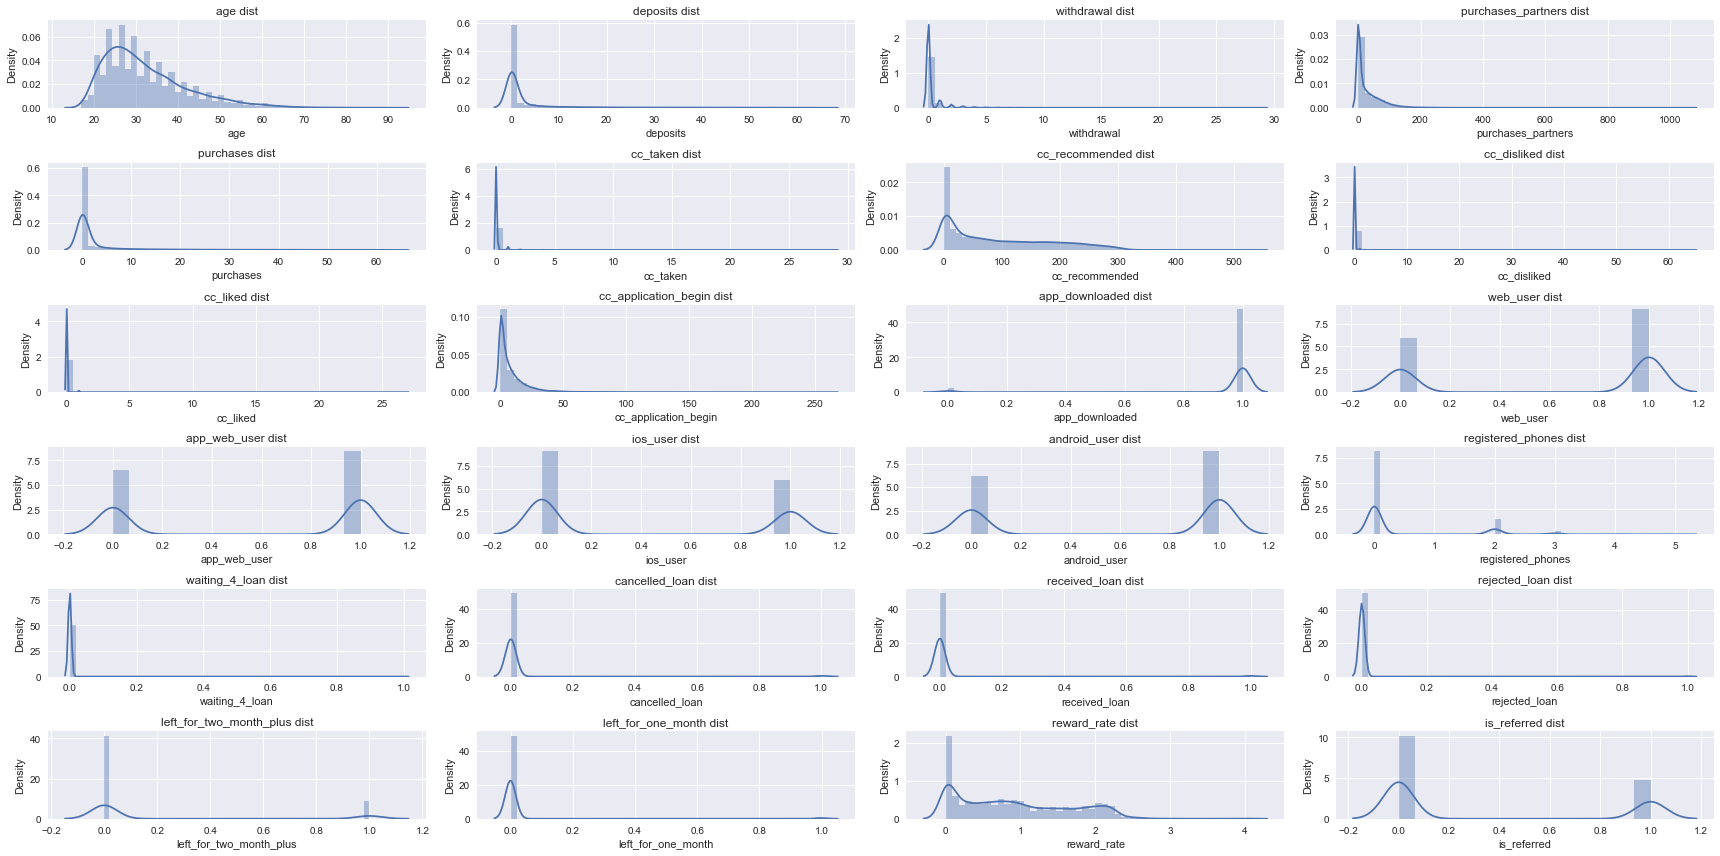

In [7]:
num_cols = dataset2.select_dtypes(exclude='object').columns.tolist()
show_dist_plot(dataset2, num_cols)

**Obseravtion**

* 50대 이상인 분들은 핀테크 어플을 잘 사용하지 않는다.
* deposits, withdrawl을 대부분 사용하지 않았다. 첫 달인 경우도 있으니 알아둬야 한다.

<Figure size 576x396 with 0 Axes>

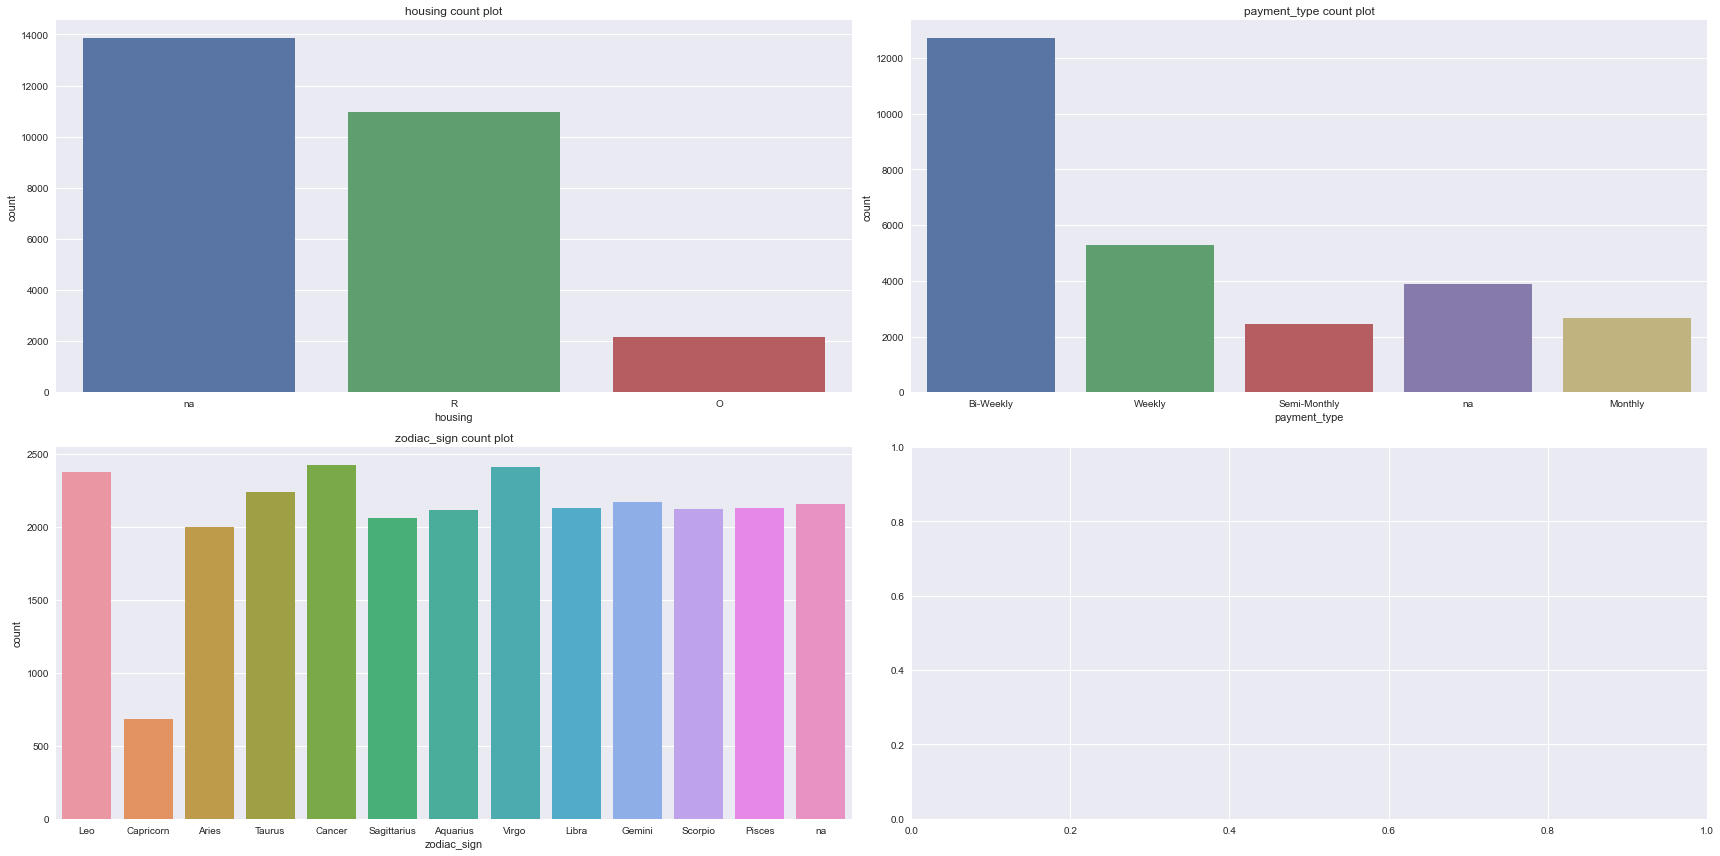

In [8]:
cat_cols = dataset.select_dtypes(include='object').columns.tolist()
show_count_plot(dataset2, cat_cols)

**Observation**

* 많은 사람들이 자가가 없거나, 전세로 살고 있다.
* 대부분 격주로 지불한다.
* 염소자리의 수가 적다. 왜일까?

In [9]:
#for pie chart
dataset2 = dataset[['housing','app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month','is_referred']]

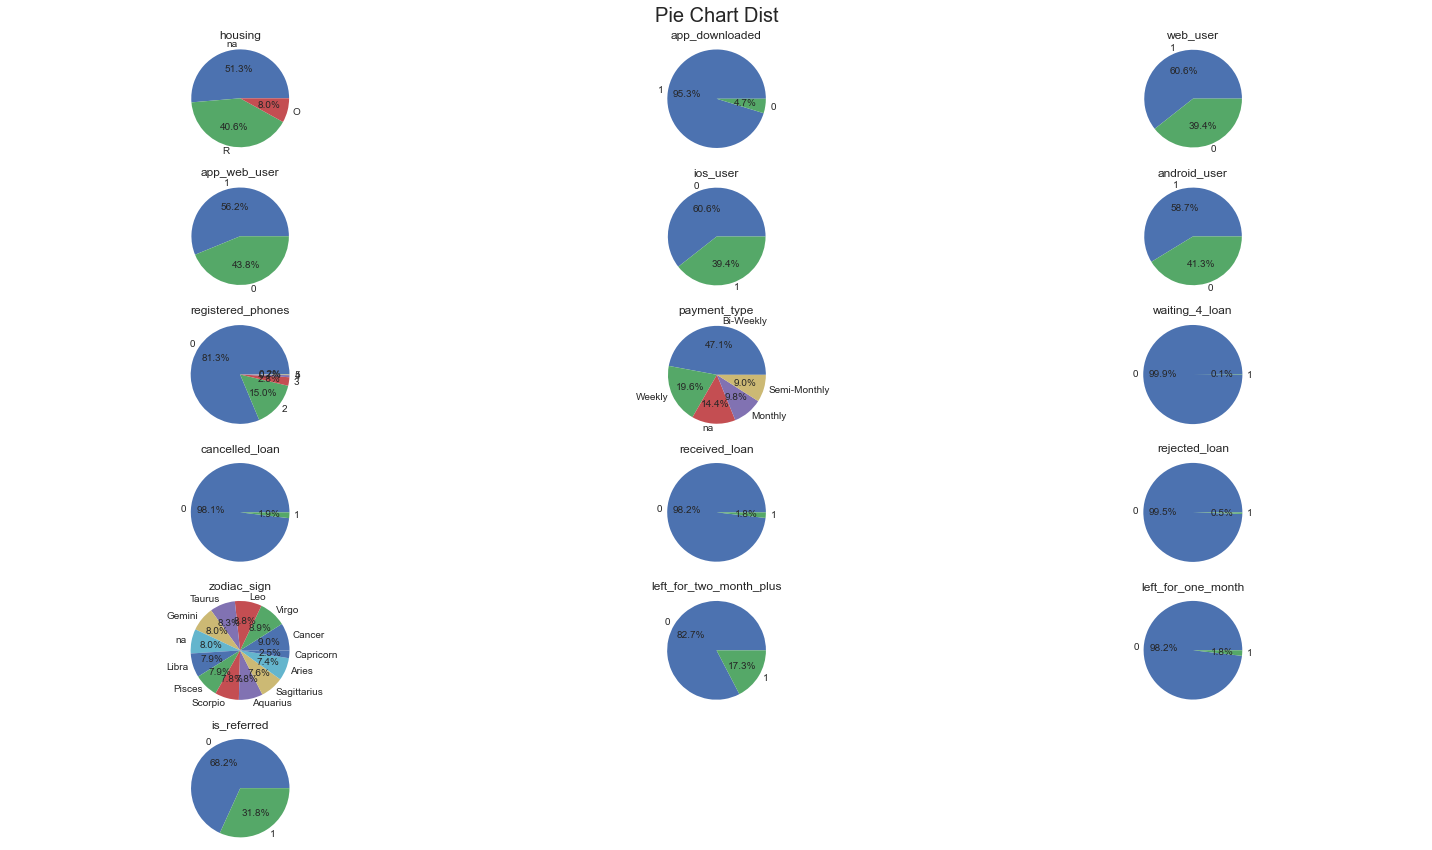

In [10]:
fig = plt.figure(figsize=(20,12))
plt.suptitle("Pie Chart Dist", fontsize=20)
for i in range(1,dataset2.shape[1] + 1):
    plt.subplot(6,3,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    values = dataset2.iloc[:, i-1].value_counts(normalize=True).values
    index = dataset2.iloc[:, i-1].value_counts(normalize=True).index
    
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
    
plt.tight_layout()

**Obseravation**

* 작은 하위세트를 가진 것들이 보이는데 모델 예측할 때의 문제가 될 수 있다. 고로 처리를 해야할 필요가 있다.

---

In [11]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [12]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [13]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [14]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [15]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

균형을 갖춘 채로 분포되어 있는가 보았다.

---

## Exploring Uneven Features

<AxesSubplot:title={'center':'Corr with target'}>

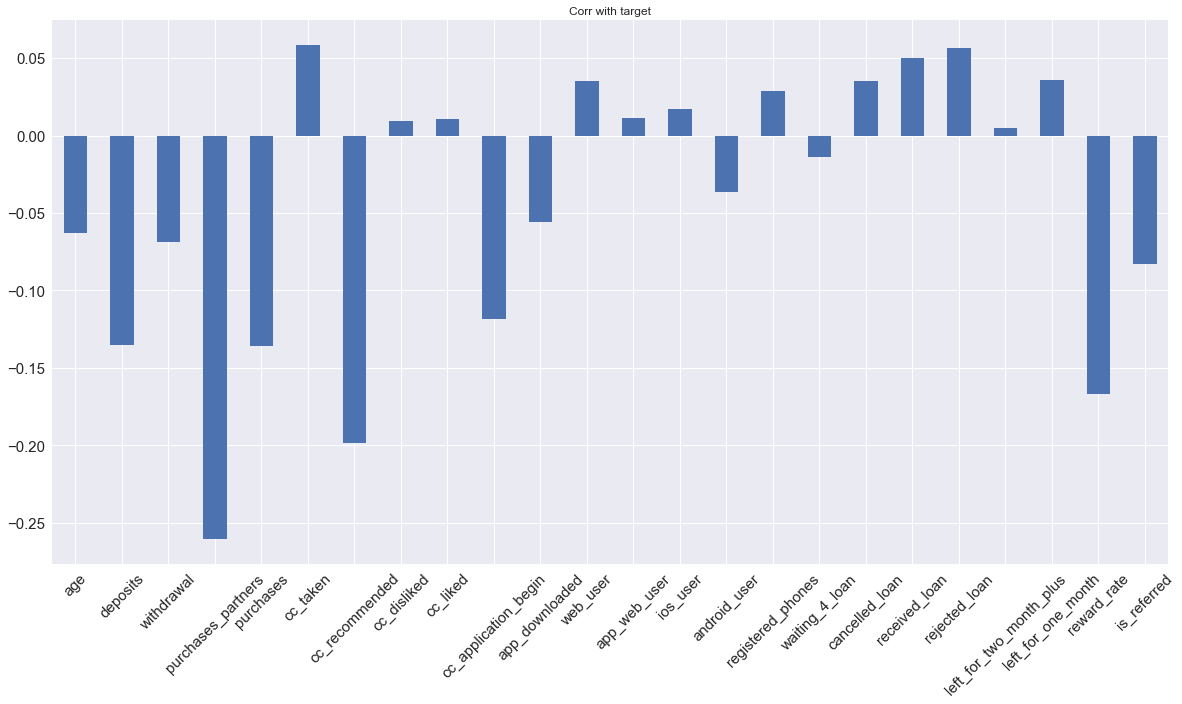

In [16]:
dataset.drop(columns=['churn','user','housing','payment_type','zodiac_sign'],axis=1).corrwith(dataset.churn).plot.bar(figsize=(20,10), title="Corr with target", fontsize=15,rot=45,grid=True)


**Observation**

* 신용카드를 만든 사람들이 구독 해지를 한다.
* 제휴 상점에서 산 횟수가 많을수록 구독 해지를 하지 않는 경향이 보인다.

## Heatmap

독립변수들 간 종속이 있는지 확인

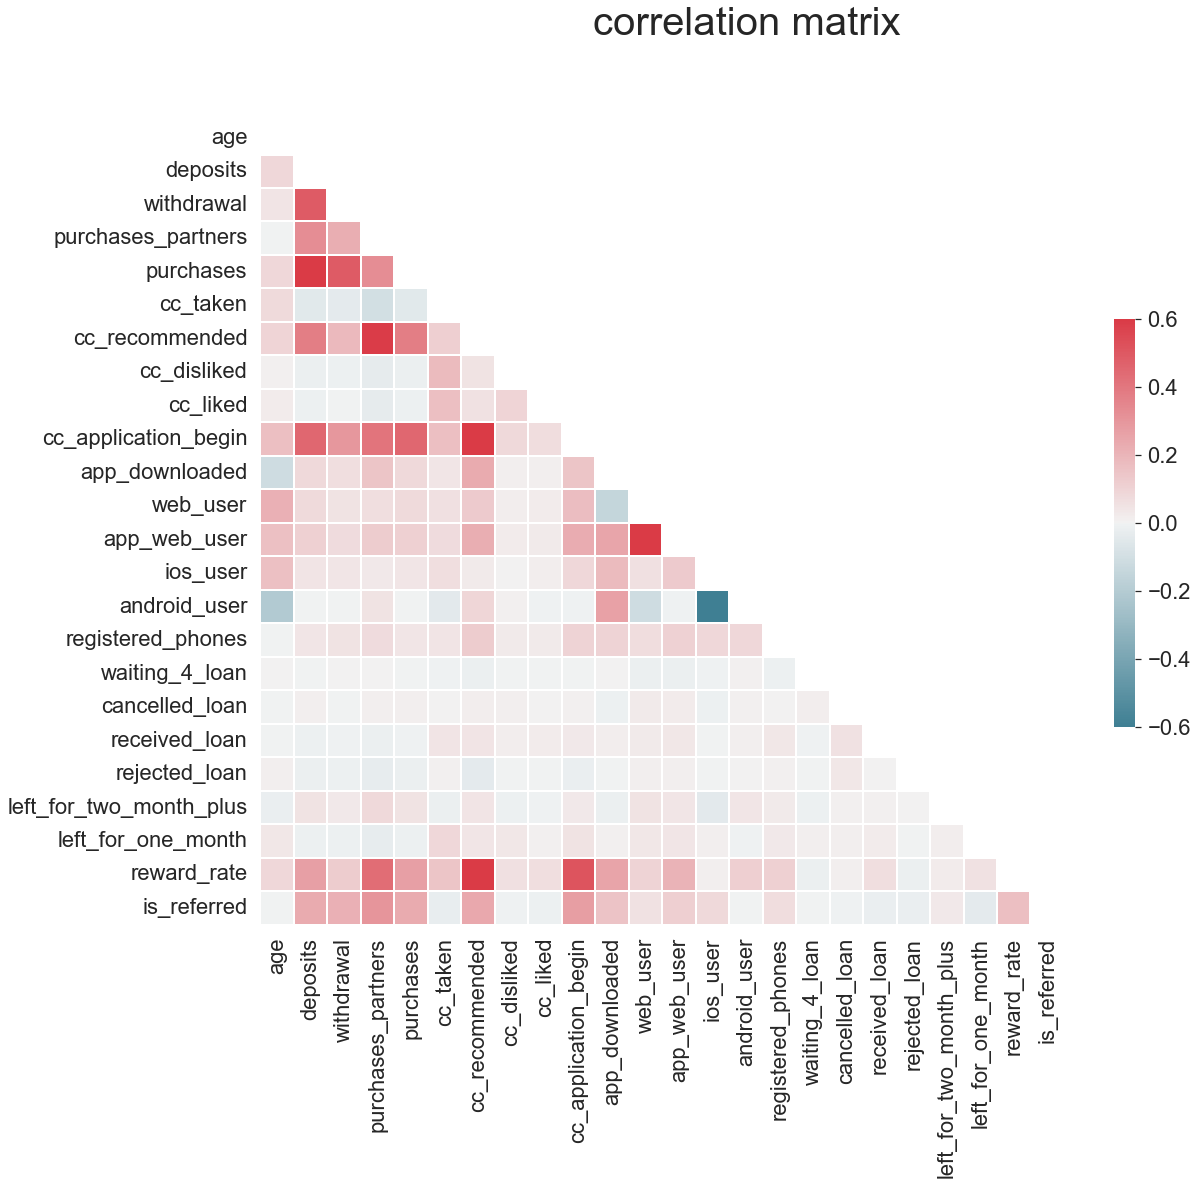

In [17]:
sns.set(style='white', font_scale=2)

corr = dataset.drop(columns=['user','churn']).corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #대각선을 기준으로 아래를 보자.

f,ax=plt.subplots(figsize=(18,15))
f.suptitle('correlation matrix', fontsize=40)

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, vmax=.6,vmin=-.6,center=0,cmap=cmap,
           square=True,linewidth=.3,cbar_kws={'shrink':.5},annot=False);

**Obseravtion**

* IOS, Android의 연관성이 높다. 둘 중 하나를 제거하는 게 좋을 것 같다.
    * 남성 여성 컬럼을 만들기보다, 남성 컬럼 하나만 만들어도 되는 것처럼 생각하면 된다.
* app_web_user, app_downloaded, web_user간에도 생각해보면 제거할필요가 있다.

In [18]:
dataset = dataset.drop(['app_web_user'],axis=1)

In [19]:
dataset.to_csv("my_churn_data.csv",index=False)

# Preprocessing

In [20]:
dataset = pd.read_csv("./my_churn_data.csv")
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0000,na,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.0000,0
1,23547,0,28.0000,R,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.4700,1
2,58313,0,35.0000,R,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.1700,0
3,8095,0,26.0000,R,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.1000,1
4,61353,1,27.0000,na,0,0,2,0,0,0,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.0300,0


In [21]:
user_identifier=dataset['user']
dataset=dataset.drop(columns=['user'])

In [22]:
#one hot
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [23]:
#새로 만들어진 더미간에도 종속관계 존재 가능
dataset =dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

In [24]:
dataset

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,0,37.0000,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0.0000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,28.0000,0,0,1,0,0,96,0,0,5,1,1,1,0,0,0,0,0,0,0,0,1.4700,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,35.0000,47,2,86,47,0,285,0,0,9,1,0,0,1,2,0,0,0,0,1,0,2.1700,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,26.0000,26,3,38,25,0,74,0,0,26,1,0,0,1,0,0,0,0,0,0,0,1.1000,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,27.0000,0,0,2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0.0300,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,1,24.0000,0,0,0,0,0,81,0,0,2,1,1,0,1,2,0,0,0,0,0,0,1.0700,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
26992,1,26.0000,0,0,2,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0.6700,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
26993,0,22.0000,0,0,37,0,0,98,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0.9300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26994,1,46.0000,2,0,16,2,0,58,0,0,2,1,1,1,0,0,0,0,0,0,1,0,0.9000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
X = dataset.drop(['churn'],axis=1)
y= dataset.churn

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=.3,
                                                random_state=42)

## datset balace

In [26]:
y_train.value_counts()

0    11090
1     7807
Name: churn, dtype: int64

**Obseravtion**

* 균형을 맞춰줄 필요가 있다.

In [27]:
pos_index = y_train[y_train.values==1].index
neg_index = y_train[y_train.values==0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
import random
random.seed(0)

higher = np.random.choice(higher,size=len(lower)) #higher과 lower 크기 동일화
lower = np.asarray(lower)
new_indexes = np.concatenate((lower,higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

#
ss = StandardScaler()
X_train2 = pd.DataFrame(ss.fit_transform(X_train))
X_test2 = pd.DataFrame(ss.transform(X_test))

In [28]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [29]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [30]:
X_train = X_train2
X_test = X_test2

---

# Model

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [32]:
from sklearn.metrics import precision_score, f1_score, accuracy_score,recall_score

In [33]:
cm = confusion_matrix(y_test,y_pred)

accuracy_score(y_test,y_pred)

0.6188418323249784

* 높은 정확도는 아니지만 실무에서는 충분히 훌륭하다.

## 정밀도
* 양성으로 예측한 것 중에 실제로 양성인 경우

In [34]:
precision_score(y_test,y_pred)

0.5298762270593257

양성으로 예측한 내용 중에 절반만 맞았다.

## 재현율

In [35]:
recall_score(y_test,y_pred)

0.7374517374517374

실제로 양성이었던 결과 중 양성이라 예측하는 경우

일단 정밀도와 재현율은 트레이드 오프다.

구독 이탈이 양성이니, 실제로 양성인 것을 양성이라고 잘 예측해야하는 것이므로 재현율이 중요할 것이다.

## F1_score

In [36]:
f1_score(y_test,y_pred)

0.6166645970445797

<AxesSubplot:>

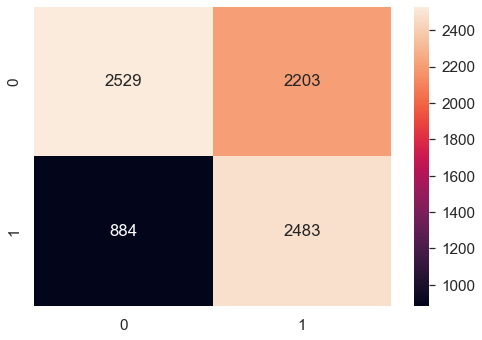

In [38]:
df_cm = pd.DataFrame(cm,index=(0,1), columns=(0,1))
plt.figure()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

# Kfold

In [39]:
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='accuracy')
scores.mean()

0.6503787502840115

In [40]:
df = pd.concat([pd.DataFrame(X_train.columns, columns= ['features']),
          pd.DataFrame(np.transpose(clf.coef_), columns =['coef'])],
         axis=1)

df.sort_values(by='coef',ascending=False)

,features,coef
1,deposits,0.5125
18,rejected_loan,0.1639
11,web_user,0.1544
12,ios_user,0.1231
17,received_loan,0.1052
14,registered_phones,0.0857
28,payment_type_Weekly,0.0734
6,cc_recommended,0.0700
16,cancelled_loan,0.0683
24,housing_R,0.0681


# 특성선택

적은 열로 같은 정확도를 높이자.

In [41]:
from sklearn.feature_selection import RFE

In [42]:
X_train.shape #41개의 열이 있으니, 20개로 줄여보자.

(15614, 41)

In [43]:
clf = LogisticRegression()
rfe = RFE(clf,n_features_to_select=20)
rfe= rfe.fit(X_train,y_train)

In [44]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False  True False  True
  True False  True False  True  True  True  True  True  True False  True
  True False False False  True False False False False False False False
 False False False False False]


True와 False로 최종결과에 포함된 필드를 볼 수 있다.

In [45]:
len(X_train.columns[rfe.support_])

20

In [46]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 15, 14,  1,  3,  1,  1,  4,  1, 16,  1,
        1,  1,  1,  1,  1, 11,  1,  1,  2, 13, 22,  1, 17, 12,  5,  7, 18,
        9, 20,  8, 10,  6, 21, 19])

순위도 알 수 있다.

* 2는 top20의 선정되지 못했지만 21번째로 중요했다.

**다시 만들자**

In [47]:
X_train[X_train.columns[rfe.support_]]

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_application_begin,web_user,ios_user,registered_phones,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,housing_O,housing_R,payment_type_Weekly
15212,-0.6077,-0.3527,-0.2910,-0.3995,-0.3524,-0.1638,-0.2647,-0.6670,-1.2357,1.2443,-0.4634,-0.1385,-0.1404,-0.0718,-0.4632,-0.1444,-0.2409,-0.2909,-0.8143,-0.4957
5244,0.7017,-0.3527,-0.2910,-0.3513,-0.3524,3.9816,1.4513,2.0594,0.8093,-0.8036,1.7227,-0.1385,-0.1404,-0.0718,2.1590,-0.1444,0.4269,-0.2909,-0.8143,-0.4957
23978,-0.5070,-0.3527,-0.2910,-0.6168,-0.3524,-0.1638,-1.0197,-0.6670,-1.2357,-0.8036,-0.4634,-0.1385,-0.1404,-0.0718,-0.4632,-0.1444,-1.0824,-0.2909,-0.8143,-0.4957
26134,0.5002,1.6090,-0.2910,-0.5202,1.6500,3.9816,0.6848,0.0998,0.8093,1.2443,-0.4634,-0.1385,-0.1404,-0.0718,2.1590,-0.1444,0.8677,-0.2909,1.2281,-0.4957
26921,-1.1114,-0.3527,-0.2910,-0.6168,-0.3524,-0.1638,-1.0197,-0.6670,-1.2357,1.2443,-0.4634,-0.1385,-0.1404,13.9347,-0.4632,-0.1444,-1.1759,-0.2909,-0.8143,-0.4957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,-0.9099,4.6093,-0.2910,0.5661,4.7125,-0.1638,1.0509,0.7814,-1.2357,-0.8036,-0.4634,-0.1385,-0.1404,-0.0718,-0.4632,-0.1444,1.4019,-0.2909,-0.8143,-0.4957
4543,-0.2048,-0.3527,-0.2910,-0.6410,-0.3524,-0.1638,-1.0197,-0.6670,-1.2357,-0.8036,-0.4634,-0.1385,-0.1404,-0.0718,-0.4632,-0.1444,-1.1759,-0.2909,-0.8143,-0.4957
20165,1.3060,-0.3527,-0.2910,0.8800,-0.3524,-0.1638,0.3073,-0.2410,0.8093,1.2443,-0.4634,-0.1385,-0.1404,-0.0718,-0.4632,-0.1444,0.5204,-0.2909,1.2281,2.0173
20203,-1.0106,-0.2373,0.7469,-0.5202,-0.2347,-0.1638,-0.8939,-0.4966,-1.2357,1.2443,-0.4634,-0.1385,-0.1404,-0.0718,-0.4632,-0.1444,-1.0423,-0.2909,1.2281,2.0173


In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train[X_train.columns[rfe.support_]],y_train)

y_pred = clf.predict(X_test[X_test.columns[rfe.support_]])

이후 진행해도 같거나 조금 더 나은 결과를 보여주었다. 무슨 의미일까?

**나머지 21개의 특성이 결국에는 예측하는데에 필요없는 특성이었다는 것이다.**

# 모델 완성

In [50]:
df = pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns= ['features']),
          pd.DataFrame(np.transpose(clf.coef_), columns =['coef'])],
         axis=1)

df.sort_values(by='coef',ascending=False)

,features,coef
1,deposits,0.5043
13,rejected_loan,0.1642
8,web_user,0.1601
12,received_loan,0.1039
10,registered_phones,0.0902
19,payment_type_Weekly,0.0888
9,ios_user,0.0789
6,cc_recommended,0.0703
18,housing_R,0.0702
11,cancelled_loan,0.0684


In [52]:
final_results = pd.concat([y_test, user_identifier], axis=1).dropna()
final_results['predict_churn'] = y_pred
final_results=final_results[['user','churn','predict_churn']].reset_index(drop=True)
final_results

,user,churn,predict_churn
0,51844,0.0000,0
1,64083,0.0000,0
2,28135,0.0000,0
3,21078,0.0000,1
4,62545,1.0000,1
...,...,...,...
8094,55935,0.0000,1
8095,24446,0.0000,0
8096,23864,1.0000,1
8097,28878,1.0000,0


# 마무리

유저들의 데이터들을 기반으로 분류모델을 만들 수 있었다.

언제 이탈하는지는 모르지만 분류 할 수 있다는 것에 중점을 둔다. 물론 Target에 시간 차원을 투입하여 해당 기간까지의 이탈을 분류할 방법도 있을 것이다.

**작업을 완료했으니 이러한 유저들을 위해 새로운 기능을 추가하면 좋을 것 같다.**